# Popular Data Science Questions
Our goal in this project is to use Data Science Stack Exchange to determine what content should a data science education company create, based on interest by subject.

Some things to note with Stack Exchange

Stack Exchange
What kind of questions are welcome on this site?
On DSSE's help center's section on questions , we can read that we should:

Avoid subjective questions.
Ask practical questions about Data Science — there are adequate sites for theoretical questions.
Ask specific questions.
Make questions relevant to others.
All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

Open Data (Dataset requests)
Computational Science (Software packages and algorithms in applied mathematics)
What, other than questions, does DSSE's home subdivide into?
On the home page we can see that we have four sections:

Questions — a list of all questions asked;

Tags — a list of tags (keywords or labels that categorize questions);

tags_ds

Users — a list of users;

Unanswered — a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

What information is available in each post?
Looking, just as an example, at this question, some of the information we see is:

For both questions and answers:
The posts's score;
The posts's title;
The posts's author;
The posts's body;
For questions only:
How many users have it on their "
The last time the question as active;
How many times the question was viewed;
Related questions;
The question's tags;
Stack Exchange Data Explorer
Perusing the table names, a few stand out as relevant for our goal:

Posts
PostTags
Tags
TagSynonyms
Running a few exploratory queries, leads us to focus our efforts on Posts table. For examples, the Tags table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

''''
Id	TagName	Count	ExcerptPostId	WikiPostId
2	machine-learning	6919	4909	4908
46	python	3907	5523	5522
81	neural-network	2923	8885	8884
194	deep-learning	2786	8956	8955
77	classification	1899	4911	4910
324	keras	1736	9251	9250
128	scikit-learn	1303	5896	5895
321	tensorflow	1224	9183	9182
47	nlp	1162	147	146
24	r	1114	49	48
'''

Getting the Data
To get the relevant data we run the following query.

SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [3]:
df.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

Safe to say that null entries in favorite correspond with no users adding a post to their favorites. It's best to move forward with replacing these null values with 0.

In [7]:
df.fillna(value={"FavoriteCount": 0}, inplace=True)
df['FavoriteCount'] = df['FavoriteCount'].astype(int)
df['Tags'] = df['Tags'].str.replace("^<|>$", "").str.split("><")
df.sample(5)


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
3777,60736,2019-09-25 09:39:28,0,11,"[machine-learning, deep-learning, cnn, object-...",0,0
4678,51213,2019-05-01 10:05:21,0,14,"[python, classification, scikit-learn, dataset...",0,0
4424,49744,2019-04-23 02:35:08,2,272,"[machine-learning, neural-network, gan, genera...",1,0
6707,53486,2019-06-09 13:31:45,1,127,"[machine-learning, loss-function]",1,1
3091,48156,2019-03-28 16:01:58,0,42,"[machine-learning, feature-extraction, feature...",1,0


In [11]:
tag_count = dict()

for tags in df['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] +=1
        else:
            tag_count[tag] = 1

In [13]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
pattern-recognition,1
model-selection,58
computer-vision,121
forecasting,85
ensemble-learning,11
dataframe,81
optimization,124
meta-learning,3
bayesian,40
implementation,9


In [27]:
top_tags = tag_count.sort_values('Count').tail(20)

In [28]:
top_tags

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


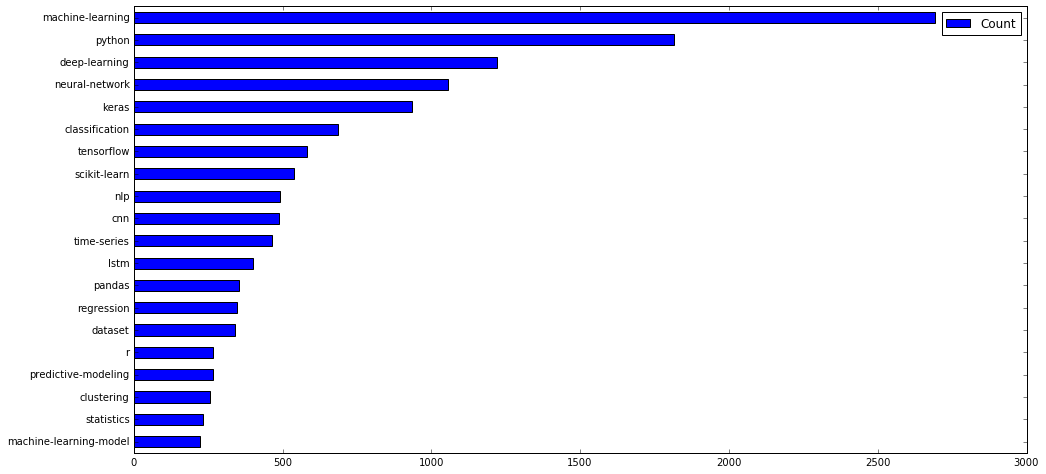

In [29]:
%matplotlib inline
top_tags.plot(kind='barh', figsize=(16,8))

In [44]:
tag_view_count = dict()

for index, row in df.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0:'Views'}, inplace=True)
most_viewed = tag_view_count.sort_values('Views').tail(20)
most_viewed

,Views
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


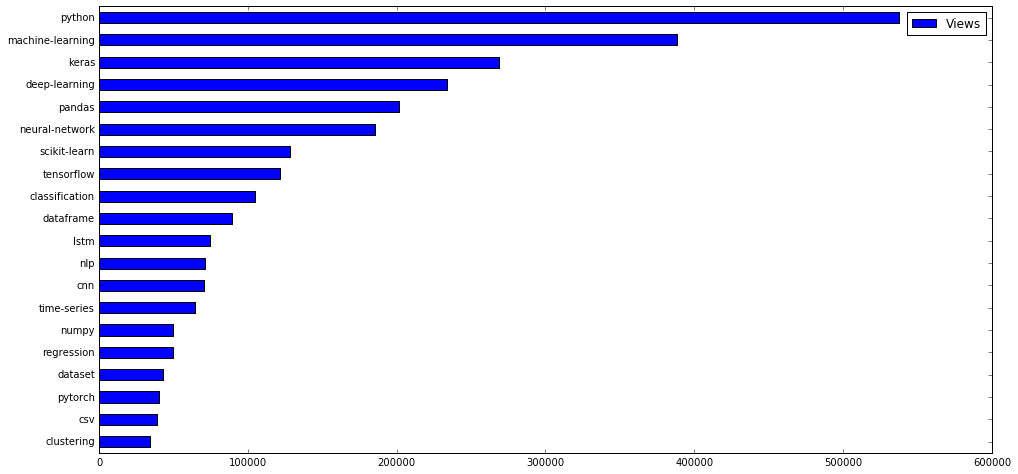

In [45]:
most_viewed.plot(kind='barh', figsize=(16, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a4de63828>],
      dtype=object)

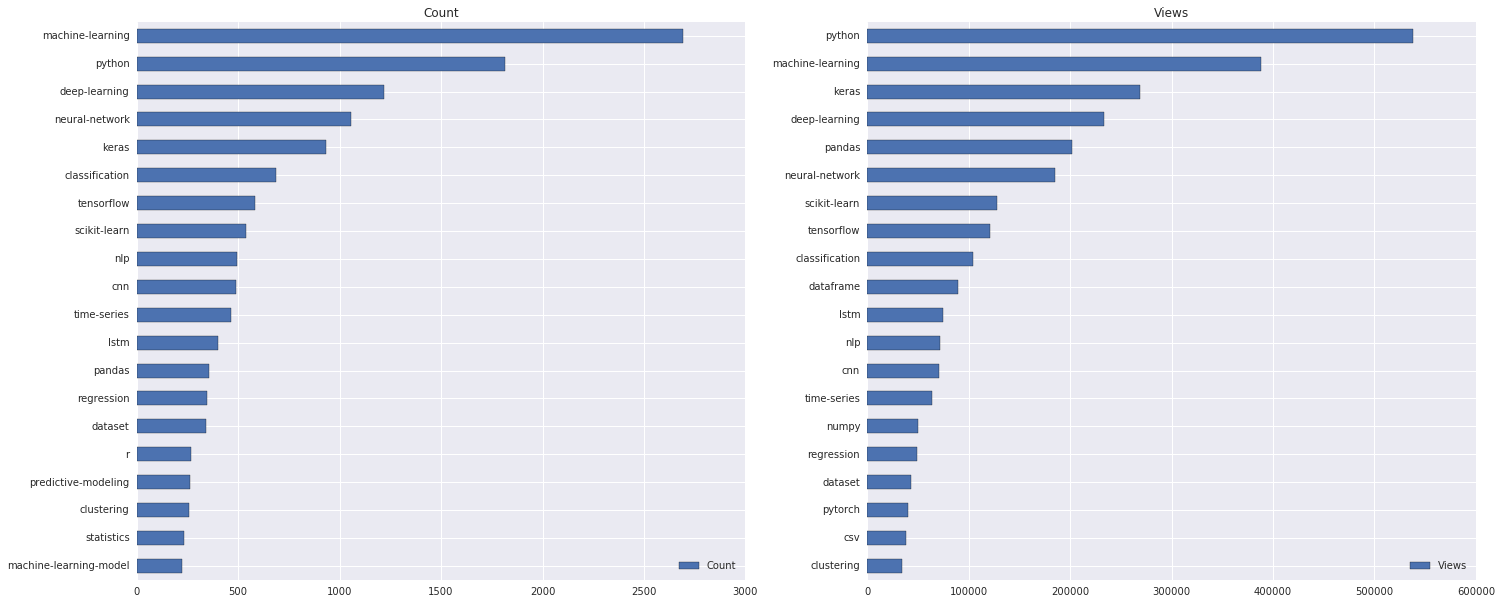

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
top_tags.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [53]:
# to see what tags are in top_tags, but not in most_viewed
in_used = pd.merge(top_tags, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,Views
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


In [55]:
in_viewed = pd.merge(top_tags, most_viewed, how="right", left_index=True, right_index=True)
in_viewed

,Count,Views
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


The tags present in `top_tags` and not present in `most_viewed` are:
- `machine-learning-model`
- `statistics`
- `predictive-modeling`
- `r`

And the tags present in most_viewed but not in most_used are:
- `csv`
- `pytorch`
- `dataframe`

In [56]:
df[df['Tags'].apply(lambda tags: True if 'r' in tags and 'pandas' in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr]",0,0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases]",3,0


In [59]:
all_tags = list(tag_count.index)
all_tags

['pattern-recognition',
 'model-selection',
 'computer-vision',
 'forecasting',
 'ensemble-learning',
 'dataframe',
 'optimization',
 'meta-learning',
 'bayesian',
 'implementation',
 'deep-network',
 'clustering',
 'cause-effect-relations',
 'privacy',
 'dimensionality-reduction',
 'tools',
 'kendalls-tau-coefficient',
 'sequence-to-sequence',
 'pathfinder',
 'numpy',
 'web-scrapping',
 'lbp',
 'bayes-error',
 'manhattan',
 'spearmans-rank-correlation',
 'state-of-the-art',
 'regularization',
 'dialog-flow',
 'feature-construction',
 '3d-object-detection',
 'linear-algebra',
 'decision-trees',
 'redshift',
 'missing-data',
 'apache-nifi',
 'automl',
 'policy-gradients',
 'ndcg',
 'normalization',
 'features',
 'manifold',
 'speech-to-text',
 'sequence',
 'feature-reduction',
 'sensors',
 'finite-precision',
 'unbalanced-classes',
 'noise',
 'ranking',
 'text-classification',
 'association-rules',
 'classifier',
 'data-science-model',
 'scipy',
 'actor-critic',
 'feature-extraction',
 

In [63]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:5]

,pattern-recognition,model-selection,computer-vision,forecasting,ensemble-learning
pattern-recognition,NaN,NaN,NaN,NaN,NaN
model-selection,NaN,NaN,NaN,NaN,NaN
computer-vision,NaN,NaN,NaN,NaN,NaN
forecasting,NaN,NaN,NaN,NaN,NaN


In [67]:
associations.fillna(0, inplace=True)
for tags in df['Tags']:
    associations.loc[tags, tags] += 1

In [68]:
associations

,pattern-recognition,model-selection,computer-vision,forecasting,ensemble-learning,dataframe,optimization,meta-learning,bayesian,implementation,...,backpropagation,linear-regression,apache-hadoop,predictor-importance,transfer-learning,bayesian-nonparametric,dump,labels,ocr,matlab
pattern-recognition,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model-selection,0,58,0,1,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
computer-vision,0,0,121,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,2,0
forecasting,0,1,0,85,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
ensemble-learning,0,0,0,0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
dataframe,0,0,0,0,0,81,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
optimization,0,0,0,0,0,1,124,0,2,0,...,1,2,0,0,0,0,0,0,0,3
meta-learning,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
bayesian,0,0,0,0,0,0,2,0,40,0,...,0,0,0,0,0,1,0,0,0,0
implementation,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0


In [74]:
relations_top_tags = associations.loc[top_tags.index, top_tags.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_top_tags.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


In [75]:
for i in range(relations_top_tags.shape[0]):
    relations_top_tags.iloc[i,i] = pd.np.NaN

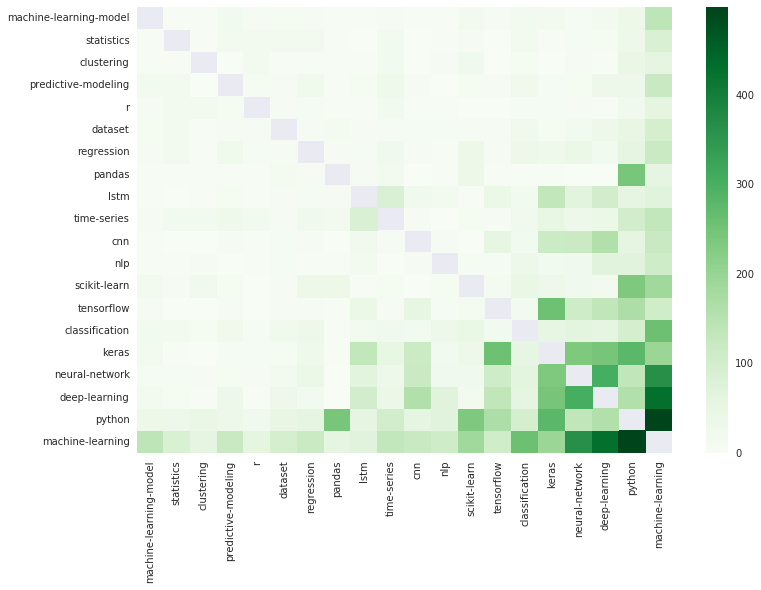

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_top_tags, cmap="Greens", annot=False)

It would seem that the most used tags also have the strongest relationship to each other. 

The strongest relationships between tags involves the pairing of `machine-learning` and...
1. `python`
2. `deep-learning`
3. `neural-network`



### Just a Passing Fad?

In [77]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [78]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

In [79]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [80]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [81]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
15576,53134,2019-06-03 14:00:50,"[deep-learning, tensorflow, rnn]",1
13298,43675,2019-01-08 14:40:44,"[pca, tsne]",0
4320,38883,2018-09-27 20:17:45,"[machine-learning, classification]",0
2558,38072,2018-09-10 22:48:12,"[python, r, data-analysis, excel]",0
21530,36860,2018-08-13 09:21:12,"[data-mining, dataset, data, rnn, lstm]",1


In [82]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [83]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [84]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


In [85]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
2,14Q4,21,216,0.097222
6,15Q4,66,382,0.172775
9,16Q3,161,585,0.275214
10,16Q4,177,527,0.335863
20,19Q2,935,2393,0.390723


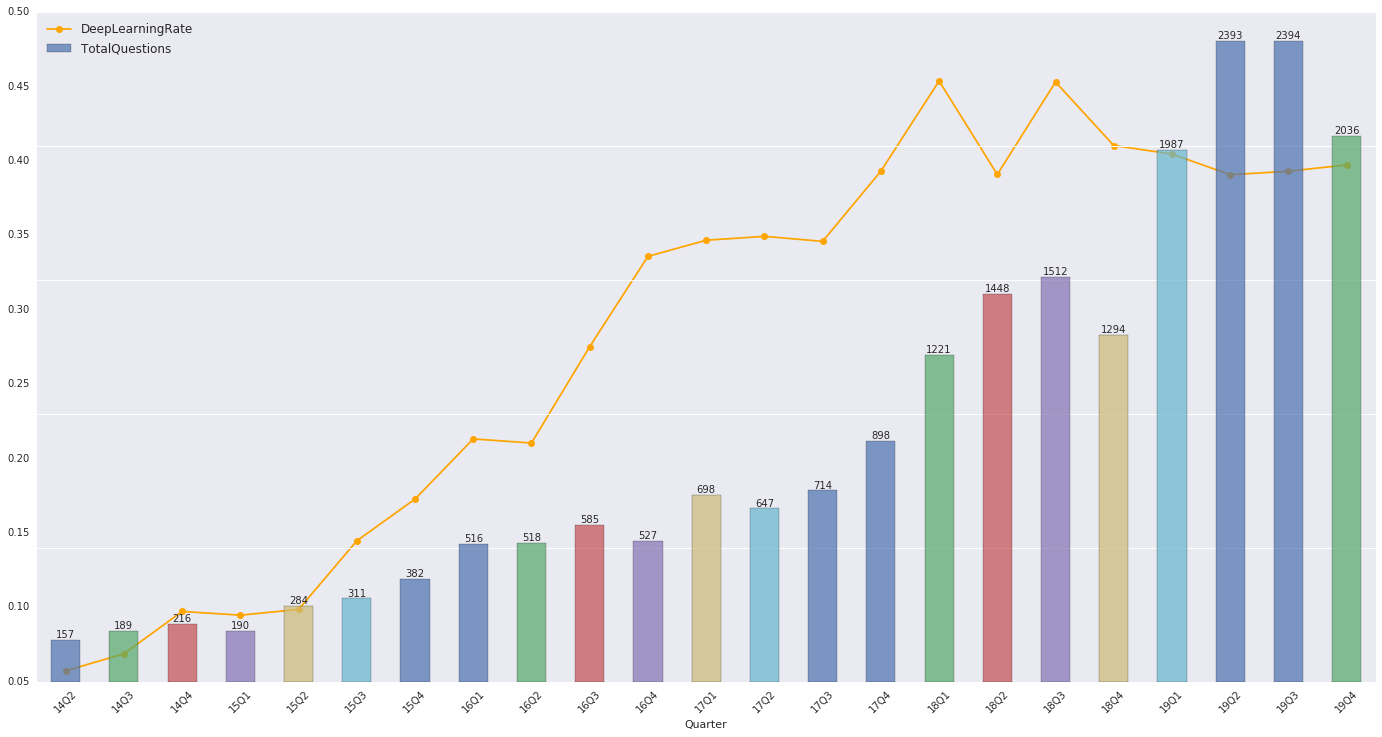

In [86]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)